## Treinamento do modelo


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [24]:
df = pd.read_csv('top_songs_features.csv')
top_songs = pd.read_csv('top_songs.csv')

# mantém somente colunas numéricas
for column in df.select_dtypes(exclude=['number']).columns:
    df = df.drop(columns=[column])
df = pd.concat([df, top_songs['popularity']], axis=1)
df.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
popularity            int64
dtype: object

### Matriz de correlação

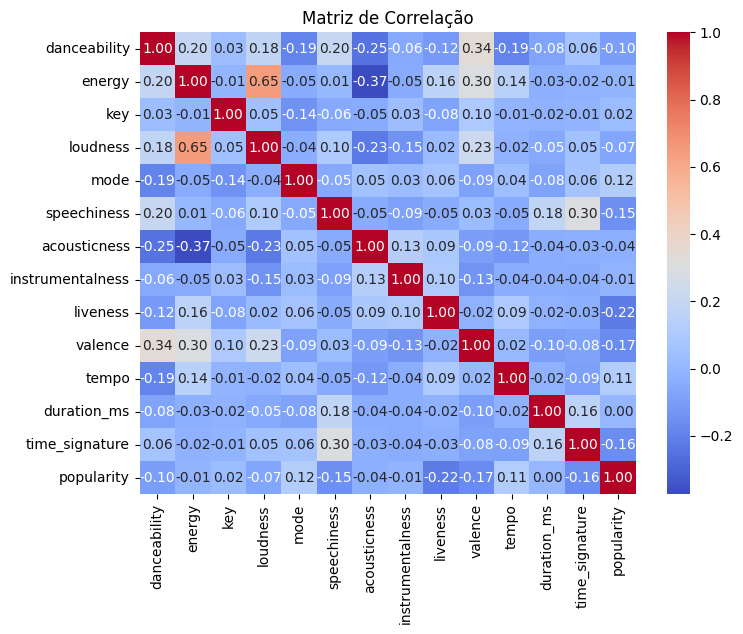

In [84]:
# Calcular a matriz de correlação
matriz_correlacao = df.corr()

# Visualizar a matriz de correlação como um mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

### 01. Random forest

O Random Forest é composto por um conjunto de árvores de decisão, onde cada árvore é construída de forma independente usando uma amostra aleatória do conjunto de dados de treinamento e um subconjunto aleatório das características. Isso introduz aleatoriedade e diversidade no processo de treinamento.

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

x = df.drop(columns='popularity')
y = df['popularity']

# Dividir o conjunto de dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Criar o modelo de Random Forest
# Você pode ajustar os hiperparâmetros conforme necessário (por exemplo, n_estimators, max_depth, etc.)
rf_model = RandomForestRegressor(n_estimators=100,
                                 random_state=42,
                                 bootstrap=True,
                                 criterion='squared_error')

# Treinar o modelo
rf_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
predictions = rf_model.predict(X_test)

### Métricas 
- Mean Squared Error (MSE): O MSE é a média dos quadrados das diferenças entre as previsões do modelo e os valores reais. Ele fornece uma medida da qualidade geral do modelo, onde valores menores indicam um melhor ajuste aos dados.
- Mean Absolute Error (MAE): O MAE é a média das diferenças absolutas entre as previsões do modelo e os valores reais. Ele mede a magnitude média dos erros do modelo, sem considerar sua direção.
- R² (R-squared): O R² é uma medida da proporção da variância nos valores de resposta que é explicada pelo modelo. Ele varia de 0 a 1, onde valores mais próximos de 1 indicam um melhor ajuste do modelo aos dados.
- Root Mean Squared Error (RMSE): O RMSE é a raiz quadrada do MSE e fornece uma interpretação na mesma unidade dos valores de destino. É uma medida comum de erro que penaliza mais fortemente grandes erros.

In [86]:
# Avaliar o desempenho do modelo usando as métricas
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
rmse = np.sqrt(mse)

# Imprimir as métricas com 4 números após a vírgula usando f-strings
print("Métricas de Avaliação:")
print(f" - Mean Squared Error (MSE): {mse:.4f}")
print(f" - Mean Absolute Error (MAE): {mae:.4f}")
print(f" - R² (R-squared): {r2:.4f}")
print(f" - Root Mean Squared Error (RMSE): {rmse:.4f}")

Métricas de Avaliação:
 - Mean Squared Error (MSE): 22.1355
 - Mean Absolute Error (MAE): 3.1534
 - R² (R-squared): 0.6678
 - Root Mean Squared Error (RMSE): 4.7048


### 02. Naive Bayes (Gaussian)

Naive Bayes é uma técnica de classificação estatística baseada no Teorema de Bayes. É um dos algoritmos de aprendizagem supervisionada.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd


x = df.drop(columns='popularity')
y = df['popularity']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

nb_model = GaussianNB()

nb_model.fit(X_train, y_train)

predictions = nb_model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
rmse = np.sqrt(mse)

print("Métricas de Avaliação:")
print(f" - Mean Squared Error (MSE): {mse:.4f}")
print(f" - Mean Absolute Error (MAE): {mae:.4f}")
print(f" - R² (R-squared): {r2:.4f}")
print(f" - Root Mean Squared Error (RMSE): {rmse:.4f}")


Métricas de Avaliação:
 - Mean Squared Error (MSE): 116.9667
 - Mean Absolute Error (MAE): 8.7000
 - R² (R-squared): -0.7551
 - Root Mean Squared Error (RMSE): 10.8151


### 03. KNN (K-nearest neighbor)

KNN é um algoritmo de aprendizado supervisionado que se baseia na proximidade dos exemplos de treinamento 
para tomar decisões de classificação ou regressão.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

x = df.drop(columns='popularity')
y = df['popularity']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

k = 5
knn_model = KNeighborsRegressor(n_neighbors=k)

knn_model.fit(X_train, y_train)

predictions = knn_model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
rmse = np.sqrt(mse)

print("Métricas de Avaliação:")
print(f" - Mean Squared Error (MSE): {mse:.4f}")
print(f" - Mean Absolute Error (MAE): {mae:.4f}")
print(f" - R² (R-squared): {r2:.4f}")
print(f" - Root Mean Squared Error (RMSE): {rmse:.4f}")

Métricas de Avaliação:
 - Mean Squared Error (MSE): 62.3538
 - Mean Absolute Error (MAE): 6.3378
 - R² (R-squared): 0.0643
 - Root Mean Squared Error (RMSE): 7.8964
